<a href="https://colab.research.google.com/github/PythonJulianPrieto/CienciaDeDatos/blob/main/emisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

em1 = pd.read_csv('emisiones-2016.csv', sep = ';')
em2 = pd.read_csv('emisiones-2017.csv',sep = ';')
em3 = pd.read_csv('emisiones-2018.csv',sep = ';')
em4 = pd.read_csv('emisiones-2019.csv',sep = ';')

In [ ]:
em1.shape

(1812, 69)

In [ ]:
emisiones = pd.concat([em1,em2,em3,em4], axis=0)
emisiones.shape

(7266, 69)

In [ ]:
#Filtrar las columnas del dataFrame
#Para quedarse con las columnas ESTACION, MAGNITUD, AÑO, MES
# Y LAS CORRESPONDIESN A LOS DIAS D01, D02, ETX

In [ ]:
columnas = ['ESTACION', 'MAGNITUD', 'ANO', 'MES']

In [ ]:
emisiones.columns

Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'D01', 'V01', 'D02', 'V02', 'D03', 'V03', 'D04', 'V04',
       'D05', 'V05', 'D06', 'V06', 'D07', 'V07', 'D08', 'V08', 'D09', 'V09',
       'D10', 'V10', 'D11', 'V11', 'D12', 'V12', 'D13', 'V13', 'D14', 'V14',
       'D15', 'V15', 'D16', 'V16', 'D17', 'V17', 'D18', 'V18', 'D19', 'V19',
       'D20', 'V20', 'D21', 'V21', 'D22', 'V22', 'D23', 'V23', 'D24', 'V24',
       'D25', 'V25', 'D26', 'V26', 'D27', 'V27', 'D28', 'V28', 'D29', 'V29',
       'D30', 'V30', 'D31', 'V31'],
      dtype='object')

In [ ]:
dias = []
for col in emisiones.columns:
  if col.startswith('D'):
    dias.append(col)

print(dias)

['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31']


In [ ]:
columnas = columnas + dias
columnas

['ESTACION',
 'MAGNITUD',
 'ANO',
 'MES',
 'D01',
 'D02',
 'D03',
 'D04',
 'D05',
 'D06',
 'D07',
 'D08',
 'D09',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D23',
 'D24',
 'D25',
 'D26',
 'D27',
 'D28',
 'D29',
 'D30',
 'D31']

In [ ]:
emisiones_cut = emisiones[columnas]
emisiones_cut.head()

,ESTACION,MAGNITUD,ANO,MES,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
0,4,1,2016,1,8.0,7.0,6.0,6.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,11.0,8.0,8.0,9.0,9.0,8.0,11.0,10.0,9.0,10.0,11.0,11.0,13.0,12.0,9.0,7.0,8.0,9.0,9.0
1,4,1,2016,2,12.0,13.0,9.0,9.0,11.0,9.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,7.0,9.0,11.0,10.0,11.0,10.0,9.0,8.0,7.0,7.0,8.0,9.0,0.0,0.0
2,4,1,2016,3,11.0,10.0,9.0,9.0,7.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,9.0,8.0,9.0,11.0,10.0,9.0,7.0,7.0,8.0,8.0,8.0,9.0,9.0,9.0,8.0,7.0,8.0,10.0,8.0
3,4,1,2016,4,8.0,9.0,9.0,8.0,8.0,9.0,9.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,7.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,8.0,9.0,9.0,8.0,8.0,8.0,0.0
4,4,1,2016,5,7.0,8.0,9.0,9.0,8.0,8.0,7.0,7.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,7.0,8.0,7.0,7.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [ ]:
#Vamos a pivotear los datos
#melt

In [ ]:
emisiones_melt = emisiones_cut.melt(id_vars = ['ESTACION', 'MAGNITUD', 'ANO', 'MES'], var_name = 'DIA', value_name='VALOR')

emisiones_melt

,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR
0,4,1,2016,1,D01,8.0
1,4,1,2016,2,D01,12.0
2,4,1,2016,3,D01,11.0
3,4,1,2016,4,D01,8.0
4,4,1,2016,5,D01,7.0
...,...,...,...,...,...,...
225241,60,14,2019,8,D31,98.0
225242,60,14,2019,9,D31,0.0
225243,60,14,2019,10,D31,47.0
225244,60,14,2019,11,D31,0.0


In [ ]:
#Creasr una columna de fechas
emisiones_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225246 entries, 0 to 225245
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ESTACION  225246 non-null  int64  
 1   MAGNITUD  225246 non-null  int64  
 2   ANO       225246 non-null  int64  
 3   MES       225246 non-null  int64  
 4   DIA       225246 non-null  object 
 5   VALOR     225246 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 10.3+ MB


In [ ]:
#Quitamos el prefijo 'D'
emisiones_melt['DIA'] = emisiones_melt['DIA'].str.strip('D')
emisiones_melt

,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR
0,4,1,2016,1,01,8.0
1,4,1,2016,2,01,12.0
2,4,1,2016,3,01,11.0
3,4,1,2016,4,01,8.0
4,4,1,2016,5,01,7.0
...,...,...,...,...,...,...
225241,60,14,2019,8,31,98.0
225242,60,14,2019,9,31,0.0
225243,60,14,2019,10,31,47.0
225244,60,14,2019,11,31,0.0


In [ ]:
emisiones_melt['ANO'] = emisiones_melt['ANO'].apply(str)

In [ ]:
emisiones_melt['MES'] = emisiones_melt['MES'].apply(str)

In [ ]:
emisiones_melt['DIA'] = emisiones_melt['DIA'].apply(str)

In [ ]:
#Concatenar
emisiones_melt['FECHA'] = emisiones_melt['ANO']+'/'+emisiones_melt['MES']+'/'+emisiones_melt['DIA']

In [ ]:
emisiones_melt

,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR,FECHA
0,4,1,2016,1,01,8.0,2016/1/01
1,4,1,2016,2,01,12.0,2016/2/01
2,4,1,2016,3,01,11.0,2016/3/01
3,4,1,2016,4,01,8.0,2016/4/01
4,4,1,2016,5,01,7.0,2016/5/01
...,...,...,...,...,...,...,...
225241,60,14,2019,8,31,98.0,2019/8/31
225242,60,14,2019,9,31,0.0,2019/9/31
225243,60,14,2019,10,31,47.0,2019/10/31
225244,60,14,2019,11,31,0.0,2019/11/31


In [ ]:
emisiones_melt.sort_values(['ESTACION', 'MAGNITUD','FECHA'])

,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR,FECHA
0,4,1,2016,1,01,8.0,2016/1/01
7266,4,1,2016,1,02,7.0,2016/1/02
14532,4,1,2016,1,03,6.0,2016/1/03
21798,4,1,2016,1,04,6.0,2016/1/04
29064,4,1,2016,1,05,7.0,2016/1/05
...,...,...,...,...,...,...,...
196178,60,14,2019,9,27,54.0,2019/9/27
203444,60,14,2019,9,28,68.0,2019/9/28
210710,60,14,2019,9,29,70.0,2019/9/29
217976,60,14,2019,9,30,55.0,2019/9/30


In [ ]:
emisiones_melt['FECHA'] = pd.to_datetime(emisiones_melt['FECHA'], format='%Y/%M/%d')
data_emisiones = emisiones_melt[['ESTACION', 'MAGNITUD', 'FECHA', 'VALOR']]
data_emisiones.head()

,ESTACION,MAGNITUD,FECHA,VALOR
0,4,1,2016-01-01 00:01:00,8.0
1,4,1,2016-01-01 00:02:00,12.0
2,4,1,2016-01-01 00:03:00,11.0
3,4,1,2016-01-01 00:04:00,8.0
4,4,1,2016-01-01 00:05:00,7.0


In [ ]:
emisiones_melt

,ESTACION,MAGNITUD,ANO,MES,DIA,VALOR,FECHA
0,4,1,2016,1,01,8.0,2016-01-01 00:01:00
1,4,1,2016,2,01,12.0,2016-01-01 00:02:00
2,4,1,2016,3,01,11.0,2016-01-01 00:03:00
3,4,1,2016,4,01,8.0,2016-01-01 00:04:00
4,4,1,2016,5,01,7.0,2016-01-01 00:05:00
...,...,...,...,...,...,...,...
225241,60,14,2019,8,31,98.0,2019-01-31 00:08:00
225242,60,14,2019,9,31,0.0,2019-01-31 00:09:00
225243,60,14,2019,10,31,47.0,2019-01-31 00:10:00
225244,60,14,2019,11,31,0.0,2019-01-31 00:11:00


In [ ]:
data_emisiones.sort_values(['ESTACION', 'MAGNITUD', 'FECHA'])

,ESTACION,MAGNITUD,FECHA,VALOR
0,4,1,2016-01-01 00:01:00,8.0
1,4,1,2016-01-01 00:02:00,12.0
2,4,1,2016-01-01 00:03:00,11.0
3,4,1,2016-01-01 00:04:00,8.0
4,4,1,2016-01-01 00:05:00,7.0
...,...,...,...,...
225241,60,14,2019-01-31 00:08:00,98.0
225242,60,14,2019-01-31 00:09:00,0.0
225243,60,14,2019-01-31 00:10:00,47.0
225244,60,14,2019-01-31 00:11:00,0.0


In [ ]:
## Mostrar las estaciones disponibles y las magnitudes disponibles 
print('Estaciones disponibles: ', data_emisiones['ESTACION'].unique())
print('Magnitudes disponibles: ', data_emisiones['MAGNITUD'].unique())

Estaciones disponibles:  [ 4  8 11 16 17 18 24 27 35 36 38 39 40 47 48 49 50 54 55 56 57 58 59 60]
Magnitudes disponibles:  [ 1  6  7  8 12  9 10 14 20 30 35 42 43 44]


In [ ]:
data_emisiones['VALOR'].describe()


count    225246.000000
mean         26.745318
std          64.888695
min          -0.140000
25%           1.690000
50%          13.000000
75%          39.000000
max       24742.000000
Name: VALOR, dtype: float64

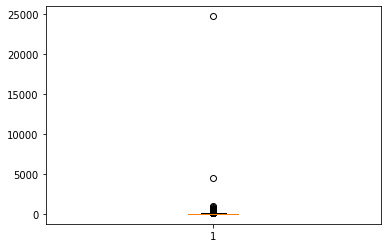

In [ ]:
import matplotlib.pyplot as plt 

plt.boxplot(data_emisiones['VALOR']);

In [ ]:
# Resumen descriptivo por contaminantes 
data_emisiones.groupby('MAGNITUD')['VALOR'].count()

MAGNITUD
1     14880
6     14880
7     35712
8     35712
9      9114
10    18228
12    35712
14    20832
20     8928
30     8928
35     8928
42     4464
43     4464
44     4464
Name: VALOR, dtype: int64

In [ ]:
# resumen descriptivo por estacion
data_emisiones.groupby('ESTACION')['VALOR'].describe()

,count,mean,std,min,25%,50%,75%,max
ESTACION,,,,,,,,
4,7440.0,34.840349,50.180551,0.00,2.00,15.00,49.00,610.0
8,20832.0,19.249461,34.306019,-0.05,0.60,3.45,23.00,501.0
11,8928.0,23.679424,38.229182,0.00,0.50,4.40,36.25,385.0
16,7440.0,31.578642,35.072295,0.00,3.00,25.00,48.00,384.0
17,7440.0,43.026478,58.333370,0.00,9.00,26.00,55.00,591.0
18,14880.0,19.243051,31.238235,0.00,0.40,5.00,27.00,336.0
24,20646.0,10.938086,21.699354,-0.08,0.30,1.33,11.00,850.0
27,5952.0,40.800403,34.754450,0.00,15.00,35.00,57.00,369.0
35,8928.0,31.195845,36.235881,0.00,5.00,19.00,48.00,354.0


In [ ]:
# Agrupemos por estacion y contaminante 
data_emisiones.groupby(['ESTACION', 'MAGNITUD'])['VALOR'].describe()

count       mean        std  ...   50%     75%    max
ESTACION MAGNITUD                                ...                     
4        1         1488.0   7.196909  16.259151  ...   7.0    9.00  610.0
         6         1488.0   0.404032   0.179920  ...   0.4    0.50    1.3
         7         1488.0  31.360215  37.567271  ...  16.0   40.25  239.0
         8         1488.0  43.592742  18.575374  ...  42.0   55.00  105.0
         12        1488.0  91.647849  72.849891  ...  68.0  117.00  467.0
...                   ...        ...        ...  ...   ...     ...    ...
60       7         1488.0  12.102823  19.484052  ...   4.0   12.00  151.0
         8         1488.0  30.561156  18.411979  ...  26.0   40.25  101.0
         10        1488.0  16.724462  12.305707  ...  14.0   21.00  215.0
         12        1488.0  49.116263  46.002389  ...  33.0   59.00  328.0
         14        1488.0  59.616263  27.301474  ...  64.0   81.00  119.0

[153 rows x 8 columns]

In [ ]:
# emisiones_melt tiene meses y años 
# emisiones por estacion cada mes del año 2016 

emisiones_melt[(emisiones_melt['ANO'] == '2016')].groupby(['ESTACION', 'MES']).VALOR.mean().unstack('MES')

MES,1,10,11,12,2,3,4,5,6,7,8,9
ESTACION,,,,,,,,,,,,
4,41.983226,56.956129,50.429677,80.626452,32.475484,30.280645,26.109032,24.943871,25.794839,23.849677,20.585806,38.492903
8,21.373065,25.961359,23.172373,29.178710,19.426820,18.850046,16.414839,17.577696,18.232765,18.616083,16.771244,20.643018
11,29.701613,39.913441,34.689785,48.217204,21.276344,21.301075,18.250000,19.996774,19.793011,20.222043,17.245161,27.828495
16,37.995484,34.952903,38.925806,47.774839,30.977419,30.450968,26.665161,28.113548,26.698065,27.676774,26.548387,31.405161
17,49.703226,58.032258,57.361290,100.612903,41.922581,36.806452,31.645161,32.296774,30.974194,31.412903,27.432258,38.219355
18,20.780323,23.196774,17.600968,31.535161,17.795484,17.247419,14.839032,15.967742,16.245806,17.317742,16.721613,18.964839
24,10.420276,11.933018,11.664608,17.040207,9.035161,9.290691,8.443088,8.934908,9.104770,11.546083,10.952512,10.966336
27,44.927419,47.000000,48.556452,64.943548,35.741935,38.862903,32.903226,33.475806,33.572581,36.919355,36.790323,40.935484
35,34.034409,38.917204,38.342473,31.541398,28.595699,29.014516,26.859677,26.442473,24.126344,32.560215,31.246237,33.588172


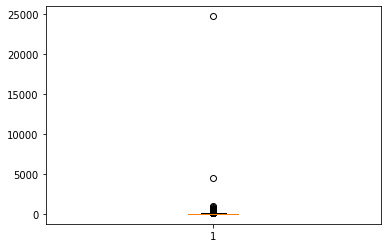

In [ ]:
import matplotlib.pyplot as plt 

plt.boxplot(data_emisiones['VALOR']);

In [ ]:
data_emisiones['VALOR'].describe()

count    225246.000000
mean         26.745318
std          64.888695
min          -0.140000
25%           1.690000
50%          13.000000
75%          39.000000
max       24742.000000
Name: VALOR, dtype: float64

In [ ]:
iqr = data_emisiones['VALOR'].quantile(0.75) - data_emisiones['VALOR'].quantile(0.25)
iqr

37.31

In [ ]:
limsup = data_emisiones['VALOR'].quantile(0.75) + 1.50*iqr
liminf = data_emisiones['VALOR'].quantile(0.25) - 1.50*iqr

{'boxes': [<matplotlib.lines.Line2D at 0x7fec264e25d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fec264dd610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fec264d59d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fec264d5f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fec26459150>,
  <matplotlib.lines.Line2D at 0x7fec264dd0d0>]}

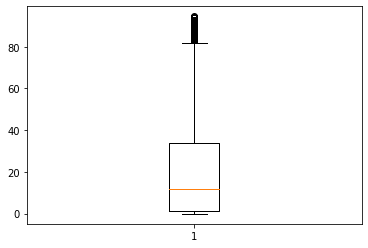

In [ ]:
filvalor = data_emisiones[(data_emisiones['VALOR'] < limsup) &  (data_emisiones['VALOR'] > liminf)]
plt.boxplot(filvalor['VALOR'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fec264fa810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fec264f5850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fec26493890>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fec26493350>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fec264b7f50>,
  <matplotlib.lines.Line2D at 0x7fec264a7850>]}

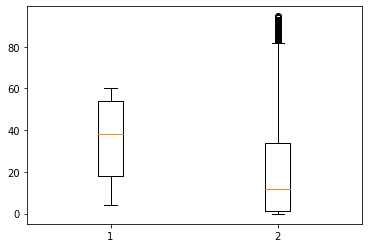

In [ ]:
plt.boxplot([filvalor['ESTACION'], filvalor['VALOR']])

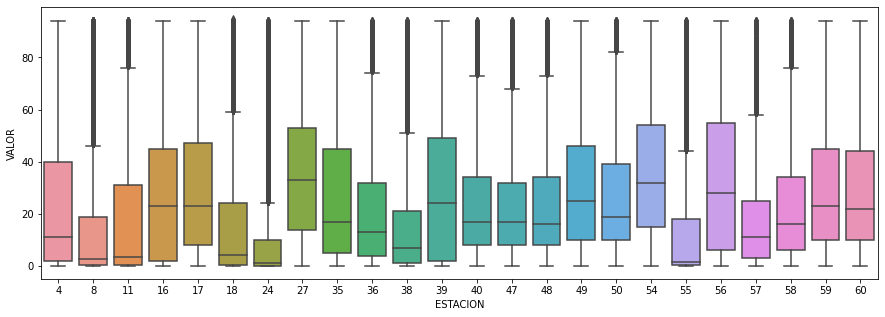

In [ ]:
import seaborn as sns
plt.subplots(figsize = (15,5))
sns.boxplot(x = 'ESTACION', y = 'VALOR', data=filvalor)